In [36]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import os
import psutil
import src.read_datasets as rd
import importlib

In [34]:
file_path_1 = 'data/data_raw/AskFeminists_comments'
file_size = os.path.getsize(file_path_1)
print(f"File size: {file_size / (1024 * 1024)} MB")

File size: 1577.5588073730469 MB


In [16]:
file_path_2 = "data/data_raw/antifeminists_submissions"
file_path_3 = "data/data_raw/AskFeminists_submissions"
file_size = os.path.getsize(file_path_2)    
print(f"File size: {file_size / (1024 * 1024)} MB")

File size: 100.73707389831543 MB


In [6]:
import os
import multiprocessing

# Using os module
num_cores_os = os.cpu_count()
print(f"Number of CPU cores (os module): {num_cores_os}")

# Using multiprocessing module
num_cores_mp = multiprocessing.cpu_count()
print(f"Number of CPU cores (multiprocessing module): {num_cores_mp}")

Number of CPU cores (os module): 8
Number of CPU cores (multiprocessing module): 8


In [35]:

# Create DataFrame for the second file
df2 = rd.create_dataframe(file_path_1)


Processed chunk size: (1290, 7)
Processed chunk size: (1371, 7)
Processed chunk size: (1391, 7)
Processed chunk size: (1034, 7)
Processed chunk size: (1547, 7)
Processed chunk size: (1406, 7)
Processed chunk size: (1623, 7)
Processed chunk size: (2029, 7)
Processed chunk size: (2243, 7)
Processed chunk size: (2274, 7)
Processed chunk size: (2485, 7)
Processed chunk size: (2430, 7)
Processed chunk size: (2622, 7)
Processed chunk size: (2417, 7)
Processed chunk size: (2240, 7)
Processed chunk size: (1993, 7)
Processed chunk size: (2273, 7)
Processed chunk size: (1994, 6)
Processed chunk size: (1954, 6)
Processed chunk size: (1682, 6)
Processed chunk size: (1913, 6)
Processed chunk size: (1844, 6)
Processed chunk size: (1861, 6)
Processed chunk size: (1936, 6)
Processed chunk size: (1930, 6)
Processed chunk size: (1716, 6)
Processed chunk size: (1276, 6)
Processed chunk size: (1727, 6)
Processed chunk size: (1438, 6)
Processed chunk size: (1448, 6)
Processed chunk size: (1445, 6)
Processe

In [45]:
importlib.reload(rd)
df3 = rd.create_dataframe(file_path_2)	

Initial chunk size: (10000, 7)
Processed chunk size: (1578, 7)
Initial chunk size: (10000, 7)
Processed chunk size: (1463, 7)
Initial chunk size: (2216, 7)
Processed chunk size: (334, 7)
Final DataFrame size: (3375, 7)


In [46]:
df3.head()

,created_utc,title,body,author,subreddit,is_self,id
0,1417572354,antifeminist experiment,Hi!\nI thought it would be interesting to have...,[deleted],antifeminists,True,2o40i6
1,1418496647,How I advanced women yesterday,"Yesterday, as part of my duties as a tech supp...",[deleted],antifeminists,True,2p6wpf
2,1420494560,I Am Writing an Anti-Feminist Argumentative Es...,"School is out, and I am so bored. Writing rese...",SackOfHellNo,antifeminists,True,2rfyxx
3,1429473417,Good job feminism. This shows one of the stupi...,\n\n\nSource: https://www.google.no/search?sit...,[deleted],antifeminists,True,335nfs
4,1429974239,The Matrix of Anti-Sexual Feminism,I'm sure this has been discussed somewhere in ...,[deleted],antifeminists,True,33tob1


### Some dataset exploration:

Max length of comments: 34437
Min length of comments: 3
Duplicate comments count: 1
sneak peak into the duplicate comments: 1579    https://youtu.be/uD773RYUH7U
Name: body, dtype: object
Unique duplicates count: 1
count     3372.000000
mean       862.167556
std       1684.362344
min          3.000000
25%        166.750000
50%        391.000000
75%        839.250000
max      34437.000000
Name: body, dtype: float64


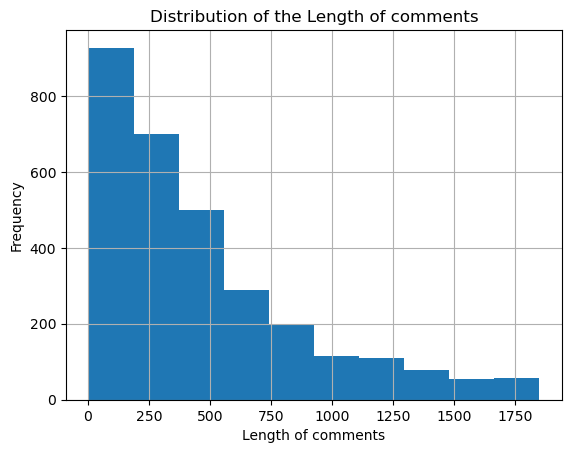

Memory usage after processing: 78.1%


In [51]:
if not df3.empty:
    df = df3
    # drop comments with len < 2 
    df = df[df['body'].str.len() > 2]

    # Check for max and min length of comments
    max_len = df['body'].str.len().max() if 'body' in df.columns else None
    min_len = df['body'].str.len().min() if 'body' in df.columns else None

    print(f"Max length of comments: {max_len}")
    print(f"Min length of comments: {min_len}")

    # Check for length distribution of comments
    if 'body' in df.columns:

        # check for duplicate comments
        duplicate_comments_count = df.duplicated(subset=['body']).sum()
        print(f"Duplicate comments count: {duplicate_comments_count}")
        print(f"sneak peak into the duplicate comments: {df[df.duplicated(subset=['body'])]['body'].head()}")
        # how many unique values are in the set of duplicates
        unique_duplicates_count = df[df.duplicated(subset=['body'])]['body'].nunique()
        print(f"Unique duplicates count: {unique_duplicates_count}")

        #df2['body'].str.len().hist()
        
        # give me a summary statistics of the length of the comments
        print(df['body'].str.len().describe())

        Q1 = df['body'].str.len().quantile(0.25)
        Q3 = df['body'].str.len().quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR

        filtered_df = df[df['body'].str.len() <= upper_bound]
        filtered_df['body'].str.len().hist()

        # create a title for the histogram
        plt.title('Distribution of the Length of comments')
        # create a label for the x-axis
        plt.xlabel('Length of comments')
        # create a label for the y-axis
        plt.ylabel('Frequency')

        # Display the histogram
        plt.show()
else:
    print("No data to analyze.")

print(f"Memory usage after processing: {psutil.virtual_memory().percent}%")

In [52]:

df3.head()

,created_utc,title,body,author,subreddit,is_self,id
0,1417572354,antifeminist experiment,Hi!\nI thought it would be interesting to have...,[deleted],antifeminists,True,2o40i6
1,1418496647,How I advanced women yesterday,"Yesterday, as part of my duties as a tech supp...",[deleted],antifeminists,True,2p6wpf
2,1420494560,I Am Writing an Anti-Feminist Argumentative Es...,"School is out, and I am so bored. Writing rese...",SackOfHellNo,antifeminists,True,2rfyxx
3,1429473417,Good job feminism. This shows one of the stupi...,\n\n\nSource: https://www.google.no/search?sit...,[deleted],antifeminists,True,335nfs
4,1429974239,The Matrix of Anti-Sexual Feminism,I'm sure this has been discussed somewhere in ...,[deleted],antifeminists,True,33tob1


#### Looking into number & length of comments

#### Time Distribution

C:\Users\elena\AppData\Local\Temp\ipykernel_18808\3846848086.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')


2014-12-03 02:05:52
2022-12-31 16:40:03


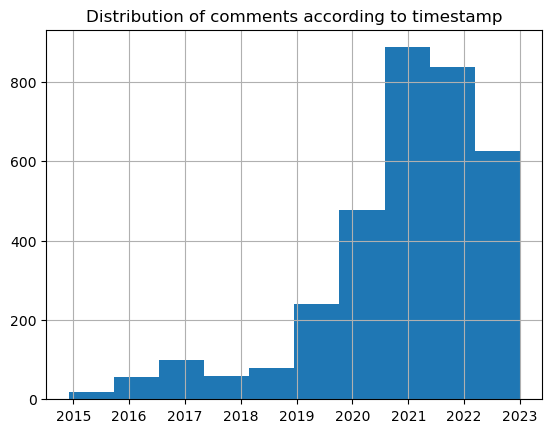

In [53]:
# check for distribution of comments according to timestamp
df = df3

df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')
df['created_utc'].hist()

# create a title for the histogram
plt.title('Distribution of comments according to timestamp')

# return the newest and oldest comnments' timestamp and transform timestamp to datetime
print(df['created_utc'].min())
print(df['created_utc'].max())

plt.show()

#### Author Distribution

In [58]:
df = df3
df_filtered = df[df['author'] != '[deleted]']
# show summary statistics of max comments by one author, min comments by one author, and median, exclude author = [deleted]
if df_filtered.empty:
    df['author'].value_counts().describe()
    # Show distribution of num of comments per author
    df['author'].value_counts().hist()
    plt.show()

# get the top 10 authors with the most comments and their comment counts
df['author'].value_counts().head(10)

# check if the body of the author called "[deleted]" is the same as the author name or empty
# df[df['author'] == '[deleted]']


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# How many comments per author are in the dataset
grouped = df2.groupby("author").count().sort_values("body", ascending=False)

grouped_deleted = df2[(df2["author"] == "[deleted]")]

grouped